In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
height = 256
width = 256
BATCH_SIZE =35
CHANNELS = 3
EPOCHS = 30

In [3]:
dateset = tf.keras.preprocessing.image_dataset_from_directory(   # it helps to load the dataset and resize and manymore like a pipeline
    'valid',
    shuffle=True,
    image_size = (height, width),
    batch_size=BATCH_SIZE 
)

Found 1500 files belonging to 5 classes.


In [4]:
class_names = dateset.class_names

In [5]:
len(dateset)

43

In [6]:
for image_size , label_batch in dateset.take(1):
    print(image_size.shape) # showing the image size
    print(label_batch.numpy()) # showing the batch size

(35, 256, 256, 3)
[1 3 1 1 4 4 0 4 1 0 4 4 1 3 0 1 4 3 0 0 0 4 1 0 4 4 2 1 3 3 2 3 1 2 3]


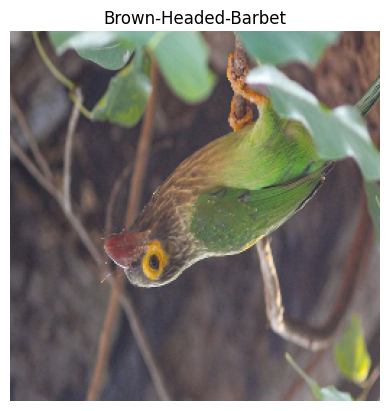

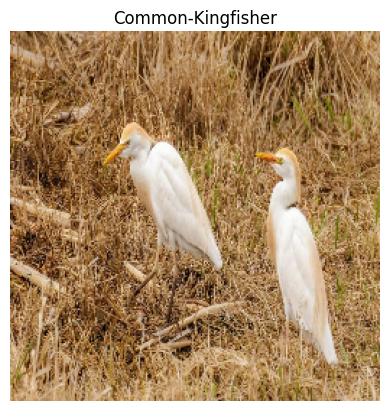

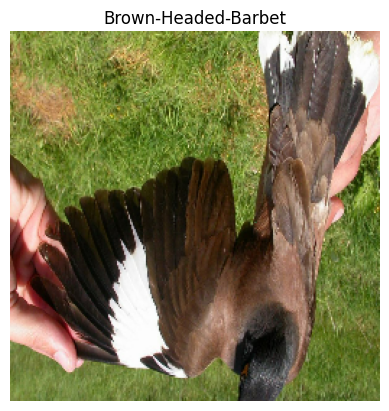

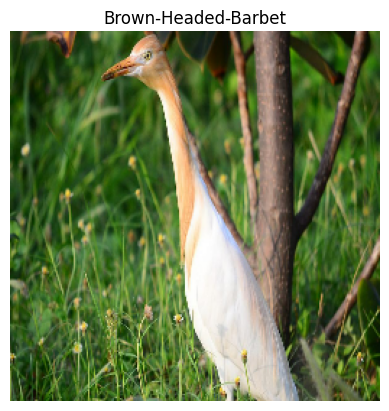

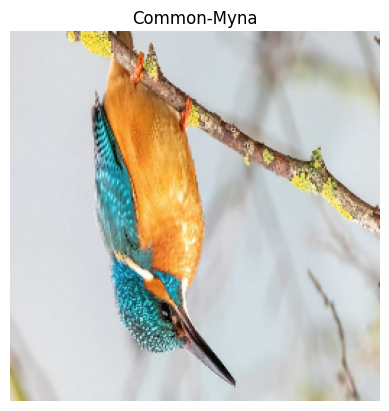

In [7]:
for image_size , batch_size in dateset.take(1):
    for i in range(5):
        plt.imshow(image_size[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis('off') # it removea the number from image axis
        plt.show()

In [8]:
'''80%=> train
   20%=> 10% validation , 10% test'''

'80%=> train\n   20%=> 10% validation , 10% test'

### createed function for splitting the data into train , validation and test set

In [9]:
def data_partition(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    
    dataset_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    train_size = int(train_split * dataset_size)
    val_size = int(val_split * dataset_size)
    test_size = int(test_split * dataset_size)
    
    
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).take(test_size) 
     
    
    
    return train_ds, val_ds, test_ds

In [10]:
train_ds, val_ds, test_ds = data_partition(dateset)

In [11]:
len(train_ds)

34

In [12]:
len(val_ds)

4

In [13]:
len(test_ds)

4

## using Optimize Tensorflow Pipeline : prefetch & cache

- **train_ds.cache():** Caches the training dataset to speed up data loading by avoiding repeated computations.
- **shuffle(1000):** Randomly shuffles the dataset with a buffer size of 1000 to ensure the model sees a different order of data in each epoch.
- **prefetch(buffer_size=tf.data.AUTOTUNE):** Prefetches batches in the background to improve training performance by overlapping data preprocessing and model execution.
- **val_ds.cache():** Caches the validation dataset to speed up data loading during validation.
- **shuffle(1000):** Randomly shuffles the validation dataset with a buffer size of 1000.
- **prefetch(buffer_size=tf.data.AUTOTUNE):** Prefetches validation data batches to improve validation performance.


In [14]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

- **resize_and_rescale:** Sequential model in Keras for image preprocessing.
- **Resizing:** Adjusts the size of input images to the specified height and width for uniformity.
- **Rescaling:** Normalizes pixel values by scaling them from [0, 255] to [0, 1] for better model performance.


In [15]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(height, width),
    layers.Rescaling(1.0/255)
])

- **data_augmentation:** Sequential model in Keras for data augmentation.
- **RandomFlip:** Randomly flips images horizontally and vertically to introduce variations.
- **RandomRotation:** Randomly rotates images by up to 20% of 360 degrees to improve robustness to different orientations.


In [16]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip(mode="horizontal_and_vertical"),
    layers.RandomRotation(factor=0.2)
])

In [17]:
input_shape = (BATCH_SIZE, height, width, CHANNELS)
n_classes = 5

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3,3), activation='relu', input_shape = input_shape ),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),    
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax')
    
])

model.build(input_shape=input_shape)

c:\Users\Sumit\Desktop\project\potato disease classification\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (35, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (35, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (35, 254, 254, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (35, 127, 127, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (35, 125, 125, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (35, 62, 62, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (35, 60, 60, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (35, 30, 30, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (35, 28, 28, 64)       │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (35, 14, 14, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (35, 12, 12, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (35, 6, 6, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (35, 4608)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (35, 64)               │       294,976 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (35, 5)                │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,197 (2.05 MB)

 Trainable params: 536,197 (2.05 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
model.compile(
    optimizer='adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [20]:
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose = 1,
    validation_data=val_ds,
)

Epoch 1/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 73s 2s/step - accuracy: 0.2198 - loss: 1.6193 - val_accuracy: 0.3143 - val_loss: 1.5959
Epoch 2/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 59s 2s/step - accuracy: 0.2555 - loss: 1.5931 - val_accuracy: 0.3500 - val_loss: 1.4758
Epoch 3/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 60s 2s/step - accuracy: 0.3217 - loss: 1.4831 - val_accuracy: 0.4214 - val_loss: 1.3689
Epoch 4/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 61s 2s/step - accuracy: 0.4042 - loss: 1.3855 - val_accuracy: 0.3500 - val_loss: 1.5636
Epoch 5/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 60s 2s/step - accuracy: 0.3820 - loss: 1.3691 - val_accuracy: 0.5500 - val_loss: 1.0921
Epoch 6/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 60s 2s/step - accuracy: 0.5145 - loss: 1.1983 - val_accuracy: 0.5857 - val_loss: 1.0431
Epoch 7/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 53s 2s/step - accuracy: 0.5958 - loss: 1.0709 - val_accuracy: 0.6429 - val_loss: 1.1404
Epoch 8/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 53s 2s/step - accuracy: 0.6140 - loss: 1.0828 - val_accuracy: 0.6786 - val_loss:

In [22]:
scores = model.evaluate(test_ds)

4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 460ms/step - accuracy: 0.8581 - loss: 0.3903


In [23]:
scores

[0.4281174838542938, 0.8500000238418579]

In [24]:
history

In [25]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 34}

In [26]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [27]:
history.history['accuracy']

[0.20506329834461212,
 0.26497891545295715,
 0.32320675253868103,
 0.4177215099334717,
 0.42784810066223145,
 0.5274261832237244,
 0.5915611982345581,
 0.6396624445915222,
 0.6641350388526917,
 0.7122362852096558,
 0.7341772317886353,
 0.746835470199585,
 0.7518987059593201,
 0.7603375315666199,
 0.7746835350990295,
 0.7932489514350891,
 0.8059071898460388,
 0.800000011920929,
 0.8084388375282288,
 0.8329113721847534,
 0.8261603116989136,
 0.8312236070632935,
 0.8607594966888428,
 0.8624472618103027,
 0.8649789094924927,
 0.8734177350997925,
 0.8717299699783325,
 0.8793249130249023,
 0.8540084362030029,
 0.8582278490066528]

In [28]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'training loss and validation loss')

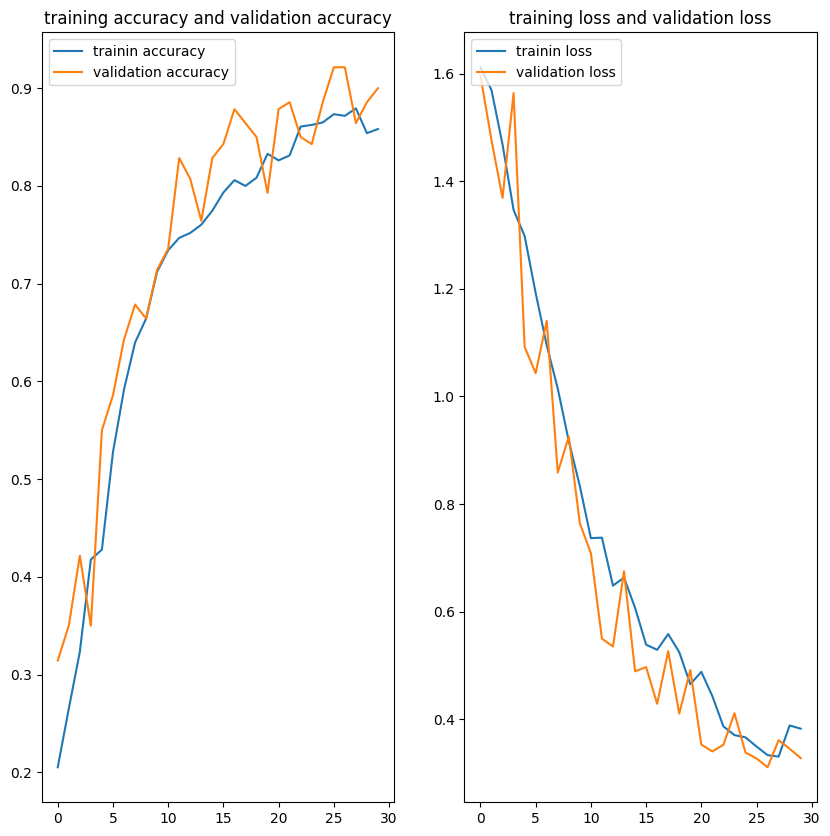

In [41]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), acc, label='trainin accuracy')
plt.plot(range(EPOCHS), val_acc, label='validation accuracy')
plt.legend(loc='upper left')
plt.title('training accuracy and validation accuracy')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS), loss, label='trainin loss')
plt.plot(range(EPOCHS), val_loss, label='validation loss')
plt.legend(loc='upper left')
plt.title('training loss and validation loss')


In [61]:
import numpy as np

first image to predict
first image's actual label: Common-Kingfisher
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step 
predicted label: Common-Kingfisher


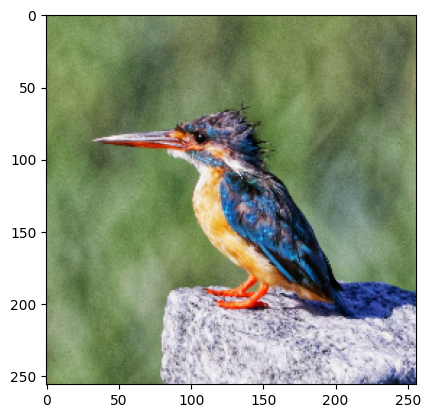

In [69]:
for image_batch, label_batch in test_ds.take(1):
    first_image = image_batch[0].numpy().astype('uint8')
    first_label = label_batch[0].numpy()
    
    print('first image to predict')
    plt.imshow(first_image)
    print("first image's actual label:", class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("predicted label:", class_names[np.argmax(batch_prediction[0])])

In [60]:
import numpy as np
np.argmax([0.6735121,0.0873351,0.08183022,0.07465867,0.08266394])

0

In [85]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)
    
    prediction = model.predict(img_array)
    
    predicted_class = class_names[np.argmax(batch_prediction[0])]
    confidence = round(100*(np.max(prediction[0])),2),
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


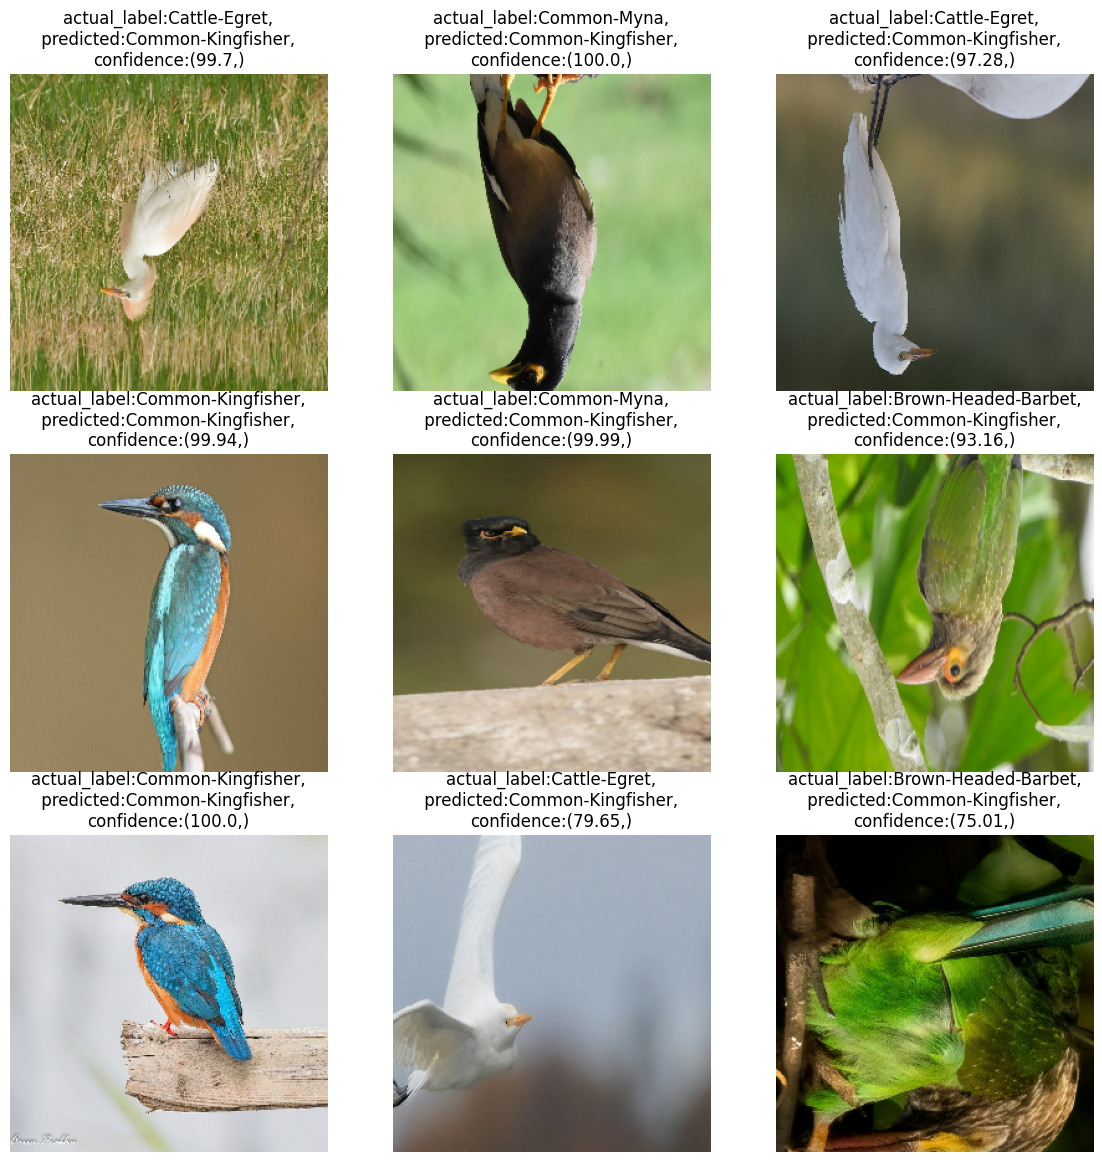

In [88]:
plt.figure(figsize=(14,14))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predicted_class, confidence = predict(model , images[i].numpy())
        actual_class= class_names[labels[i]]
        
        plt.title(f"actual_label:{actual_class},\n predicted:{predicted_class}, \nconfidence:{confidence}")
        plt.axis('off')
      

In [97]:
# Example saving model with .keras extension
model.save('models/model.keras')